In [1]:
# Import required libraries
import os
from pydub import AudioSegment, silence 
import matplotlib.pyplot as plt
import numpy as np
import wave

In [2]:
# shows the sound waves
def visualize(path: str,sil=None):
    raw = wave.open(path)
    signal = raw.readframes(-1)
    signal = np.frombuffer(signal, dtype ="int16")
    f_rate = raw.getframerate()
    time = np.linspace(
        0, # start
        len(signal) / f_rate,
        num = len(signal)
    )
    plt.figure(1)
    plt.title("Sound Wave")
    plt.xlabel("Time")
    plt.plot(time, signal)
    if sil:
        for i in sil:
            plt.axvline(x=i[0], color='red') 
            plt.axvline(x=i[1], color='red')
    plt.show()

[(11.888, 11.955), (12.138, 12.189), (32.263, 32.318), (36.531, 36.59), (39.726, 39.791), (40.676, 40.758), (40.862, 40.915), (40.966, 41.025), (41.825, 41.884), (44.224, 44.314), (44.714, 44.783), (44.843, 44.91), (45.14, 45.199), (45.422, 45.516), (45.524, 45.578), (46.242, 46.301), (47.975, 48.033), (49.723, 49.788), (51.457, 51.514), (54.304, 54.359), (54.488, 54.546), (56.21, 56.282), (59.531, 59.584), (61.34, 61.408), (61.685, 61.745), (62.766, 62.825), (62.946, 63.002), (63.946, 63.998), (64.323, 64.4), (66.307, 66.362), (66.669, 66.725), (70.919, 70.976), (72.4, 72.461), (73.046, 73.116), (73.453, 73.519), (73.663, 73.753), (73.983, 74.084), (76.118, 76.178), (80.015, 80.085), (81.117, 81.169), (82.919, 82.97), (84.084, 84.135), (85.066, 85.132), (97.12, 97.179), (99.407, 99.458), (105.33, 105.399), (105.511, 105.576), (106.172, 106.272), (106.572, 106.626), (107.989, 108.056), (110.917, 110.999), (116.322, 116.372), (116.848, 116.973)]


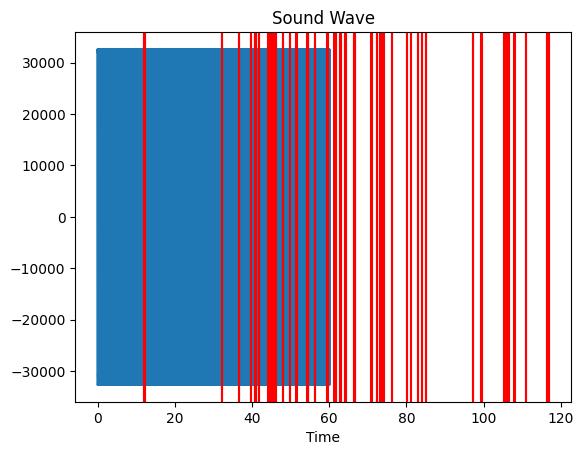

In [4]:
# Pass audio path
file ='../assets/audio01.wav'
assert os.path.isfile(file)

myaudio = AudioSegment.from_wav(file)

silenc = silence.detect_silence(myaudio, min_silence_len=50, silence_thresh=-100)
silenc = [((start/1000),(stop/1000)) for start,stop in silenc]
print(silenc)

if len(silenc)>0:
    visualize(file,silenc)